# Linear and non-linear polynomial regression task
### Nafis Ahmed

## Create a new python project and import the data

In [2]:
import pandas as pd

data = pd.read_csv('a1.csv')
data.head()

,Growing Time,Dry Weight
0,1,16
1,2,33
2,3,65
3,4,97
4,5,121


In [50]:
x = data.iloc[:,0:1].values
y = data.iloc[:,1:2].values

## Using python: draw a scatter plot for the relationship between the two attributes in the dataset.

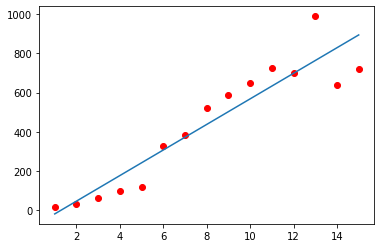

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x,y, color = "red")

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

## Suppose that we want to fit a model to describe how the mean dry weight of onions depends upon growing time.

In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Fit a linear model for the dependency

In [88]:
from sklearn.model_selection import train_test_split

X = data[["Growing Time"]]
Y = data["Dry Weight"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

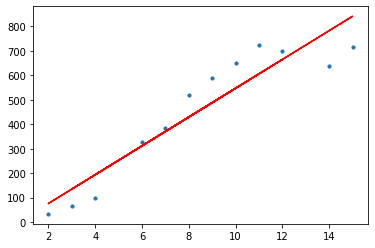

In [64]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_train)
plt.scatter(X_train, Y_train, s=10)
plt.plot(X_train, y_pred, color='r')
plt.show()

## Do you think this linear model is a good representative for the relationship? 

I think this linear model is a fair representation of the relationship displaying the positive linear correlation between them as it passes through a decent amount of data points while minimizing the squared error. However, it is evident that a polynomial regression of higher degree can definitely fit the model and represent the relationship better.

## Fit the data in a non-linear regression model of degrees 2, 3 and 4.

The RMSE is: 49.867999545003265
The R2 value is: 0.9614839874261204


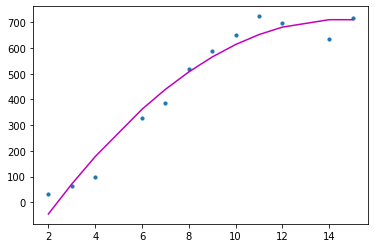

In [48]:
#DEGREE 2

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import operator 
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("The RMSE is:",rmse)
print("The R2 value is:",r2)

plt.scatter(X_train, Y_train, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
X_train, y_poly_pred = zip(*sorted_zip)
plt.plot(X_train, y_poly_pred, color='m')
plt.show()

The RMSE is: 35.55469113238329
The R2 value is: 0.9804209666302165


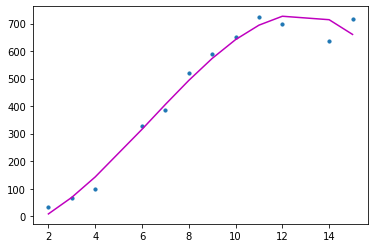

In [89]:
#DEGREE 3

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("The RMSE is:",rmse)
print("The R2 value is:",r2)

plt.scatter(X_train, Y_train, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
X_train, y_poly_pred = zip(*sorted_zip)
plt.plot(X_train, y_poly_pred, color='m')
plt.show()

The RMSE is: 23.579367410561392
The R2 value is: 0.9913888386786431


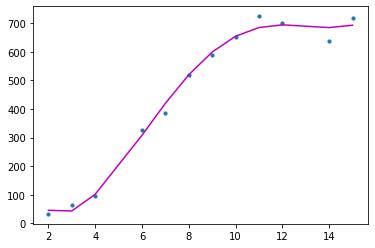

In [55]:
#DEGREE 4

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("The RMSE is:",rmse)
print("The R2 value is:",r2)

plt.scatter(X_train, Y_train, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
X_train, y_poly_pred = zip(*sorted_zip)
plt.plot(X_train, y_poly_pred, color='m')
plt.show()

The RMSE is: 4.761508992138983
The R2 value is: 0.999648854874695


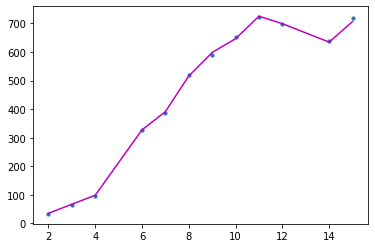

In [71]:
#DEGREE 10

polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y_train,y_poly_pred))
r2 = r2_score(Y_train,y_poly_pred)
print("The RMSE is:",rmse)
print("The R2 value is:",r2)

plt.scatter(X_train, Y_train, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_poly_pred), key=sort_axis)
X_train, y_poly_pred = zip(*sorted_zip)
plt.plot(X_train, y_poly_pred, color='m')
plt.show()

## Which model is the best and why? 

The polynomial regression model of the 3rd degree is the best model as it represents the data well. It passes through most points rather than overfitting like the 4th degree resulting in a good trade-off between variance and bias 

## Which model over-fits, under-fits and fits the data.

#### Overfit: 4th degree polynomial regression 
#### Underfit: 1st degree polynomial regression(linear regression) 
#### Fit: 3rd degree polynomial regression

## Based on the model you chose, calculate the accuracy of the model using different measures.

#### Two scores I got from RMSE and R^2
The RMSE is: 35.55469113238329
The R2 value is: 0.9804209666302165

## Predicting the dry Weight of an onion bulb that of a “growing time value equals to a random 2 digit.

In [103]:
#test value: 95
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

pol_reg.predict(poly_reg.fit_transform([[95]]))

array([[-752087.87853549]])

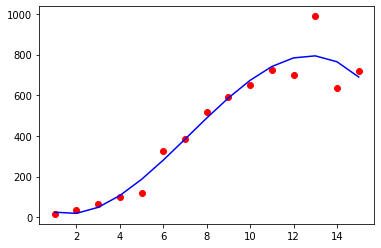

In [104]:
plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')

A random forest classifier prediction or SVM classifier may also be a good fit for the data